In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.set_option('display.max_columns', 15)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_excel("/content/Coffee Shop Sales.xlsx")

In [3]:
df.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df.describe(include='all')

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
count,149116.00,149116,149116,149116.00,149116.00,149116,149116.00,149116.00,149116,149116,149116
unique,NaN,NaN,25762,NaN,NaN,3,NaN,NaN,9,29,80
top,NaN,NaN,09:31:15,NaN,NaN,Hell's Kitchen,NaN,NaN,Coffee,Brewed Chai tea,Chocolate Croissant
freq,NaN,NaN,41,NaN,NaN,50735,NaN,NaN,58416,17183,3076
mean,74737.37,2023-04-15 11:50:32.173609984,NaN,1.44,5.34,NaN,47.92,3.38,NaN,NaN,NaN
min,1.00,2023-01-01 00:00:00,NaN,1.00,3.00,NaN,1.00,0.80,NaN,NaN,NaN
25%,37335.75,2023-03-06 00:00:00,NaN,1.00,3.00,NaN,33.00,2.50,NaN,NaN,NaN
50%,74727.50,2023-04-24 00:00:00,NaN,1.00,5.00,NaN,47.00,3.00,NaN,NaN,NaN
75%,112094.25,2023-05-30 00:00:00,NaN,2.00,8.00,NaN,60.00,3.75,NaN,NaN,NaN
max,149456.00,2023-06-30 00:00:00,NaN,8.00,8.00,NaN,87.00,45.00,NaN,NaN,NaN


In [6]:
print(df.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [7]:
important_cols = ['store_id', 'store_location', 'product_id',
                  'product_category', 'product_type', 'product_detail']

In [8]:
for col in important_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(8))


store_id: 3 unique values
store_id
8    50735
3    50599
5    47782
Name: count, dtype: int64

store_location: 3 unique values
store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

product_id: 80 unique values
product_id
71    3076
50    3053
59    3029
54    3026
29    3013
38    2990
61    2961
52    2955
Name: count, dtype: int64

product_category: 9 unique values
product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Name: count, dtype: int64

product_type: 29 unique values
product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Name: 

In [9]:
df.shape

(149116, 11)

In [10]:
df_clean = df.copy()

In [11]:
print("Earliest transaction:", df_clean['transaction_date'].min())
print("Latest transaction:", df_clean['transaction_date'].max())
print("Days covered:", (df_clean['transaction_date'].max() - df_clean['transaction_date'].min()).days + 1)
print("Unique dates:", df_clean['transaction_date'].nunique())

Earliest transaction: 2023-01-01 00:00:00
Latest transaction: 2023-06-30 00:00:00
Days covered: 181
Unique dates: 181


In [12]:
df_clean['date']         = df_clean['transaction_date'].dt.date
df_clean['weekday']      = df_clean['transaction_date'].dt.day_name()
df_clean['weekday_num']  = df_clean['transaction_date'].dt.weekday
df_clean['is_weekend']   = df_clean['weekday_num'].isin([5,6]).astype(int)
df_clean['month']        = df_clean['transaction_date'].dt.month
df_clean['month_name']   = df_clean['transaction_date'].dt.month_name()
df_clean['week_of_year'] = df_clean['transaction_date'].dt.isocalendar().week

In [13]:
df_clean['revenue'] = df_clean['transaction_qty'] * df_clean['unit_price']

In [14]:
print(df_clean['revenue'].describe())

count   149116.00
mean         4.69
std          4.23
min          0.80
25%          3.00
50%          3.75
75%          6.00
max        360.00
Name: revenue, dtype: float64


In [15]:
print("Zero quantity rows:", (df_clean['transaction_qty'] == 0).sum())
print("Negative quantity rows:", (df_clean['transaction_qty'] < 0).sum())

print("\nZero price rows:", (df_clean['unit_price'] == 0).sum())
print("Negative price rows:", (df_clean['unit_price'] < 0).sum())

print("\nVery high single transaction qty (>20):", (df_clean['transaction_qty'] > 20).sum())
print("Very high unit price (>15):", (df_clean['unit_price'] > 15).sum())

Zero quantity rows: 0
Negative quantity rows: 0

Zero price rows: 0
Negative price rows: 0

Very high single transaction qty (>20): 0
Very high unit price (>15): 1532


In [16]:
df_clean['product_name'] = df_clean['product_detail']

In [17]:
df_clean['product_short'] = df_clean['product_detail'].str[:25] + '...'

print("Top 10 products by transaction count:")
print(df_clean['product_name'].value_counts().head(10))

Top 10 products by transaction count:
product_name
Chocolate Croissant             3076
Earl Grey Rg                    3053
Dark chocolate Lg               3029
Morning Sunrise Chai Rg         3026
Columbian Medium Roast Rg       3013
Latte                           2990
Sustainably Grown Organic Lg    2961
Traditional Blend Chai Rg       2955
Spicy Eye Opener Chai Lg        2951
Peppermint Rg                   2949
Name: count, dtype: int64


In [18]:
price_stats = df_clean.groupby('product_name')['unit_price'].agg(['min', 'max', 'mean', 'nunique']).round(2)
price_stats['price_range'] = price_stats['max'] - price_stats['min']

print("Products with actual price variation (nunique > 1):")
print(price_stats[price_stats['nunique'] > 1].sort_values('nunique', ascending=False).head(12))

print("\nProducts with fixed price:")
print(price_stats[price_stats['nunique'] == 1].shape[0], "products")

Products with actual price variation (nunique > 1):
                            min   max  mean  nunique  price_range
product_name                                                     
Organic Decaf Blend       12.00 28.00 22.61        4        16.00
Ginger Scone               2.65  4.06  3.18        3         1.41
Chocolate Chip Biscotti    3.50  4.38  3.51        2         0.88
Chocolate Croissant        3.75  4.69  3.76        2         0.94
Cranberry Scone            3.25  4.06  3.26        2         0.81
Croissant                  3.50  4.38  3.51        2         0.88
Almond Croissant           3.75  4.69  3.75        2         0.94
Ginger Biscotti            3.50  4.38  3.51        2         0.88
Hazelnut Biscotti          3.25  4.06  3.26        2         0.81
I Need My Bean! Latte cup 14.00 23.00 14.33        2         9.00
I Need My Bean! Diner mug 12.00 23.00 12.25        2        11.00
I Need My Bean! T-shirt   23.00 28.00 27.89        2         5.00

Products with fixed pri

In [19]:
df_clean.to_pickle('coffee_sales_clean.pkl')

In [20]:
df_clean.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'date', 'weekday', 'weekday_num', 'is_weekend', 'month', 'month_name',
       'week_of_year', 'revenue', 'product_name', 'product_short'],
      dtype='object')

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [22]:
monthly = df_clean.groupby('month_name')['revenue'].sum().reset_index()


In [23]:
monthly_qty = df_clean.groupby('month_name')['transaction_qty'].sum().reset_index()

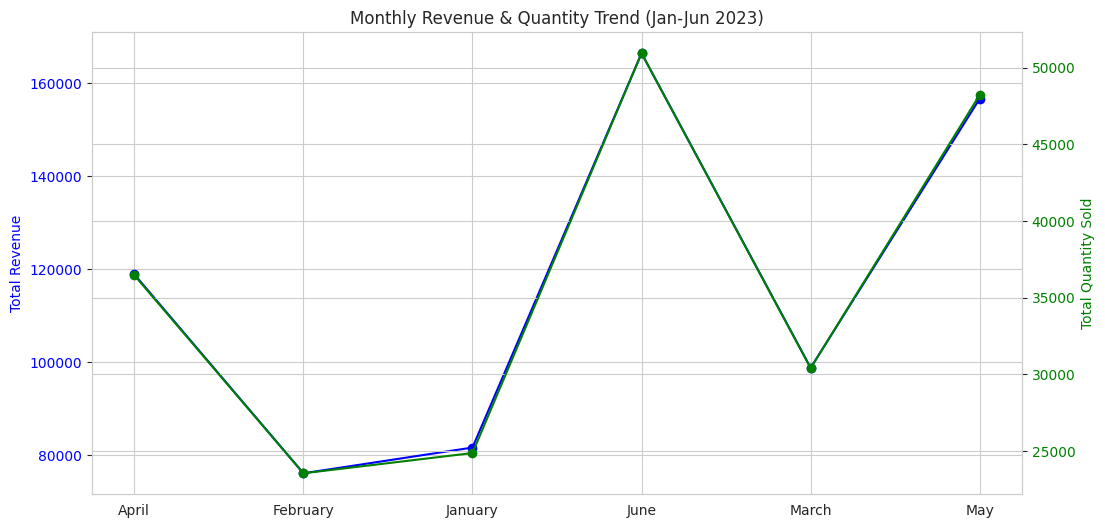

In [24]:
fig, ax1 = plt.subplots()

ax1.plot(monthly['month_name'], monthly['revenue'], color='blue', marker='o', label='Revenue')
ax1.set_ylabel('Total Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(monthly_qty['month_name'], monthly_qty['transaction_qty'], color='green', marker='o', label='Total Qty')
ax2.set_ylabel('Total Quantity Sold', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Monthly Revenue & Quantity Trend (Jan-Jun 2023)')
plt.xticks(rotation=45)
plt.show()

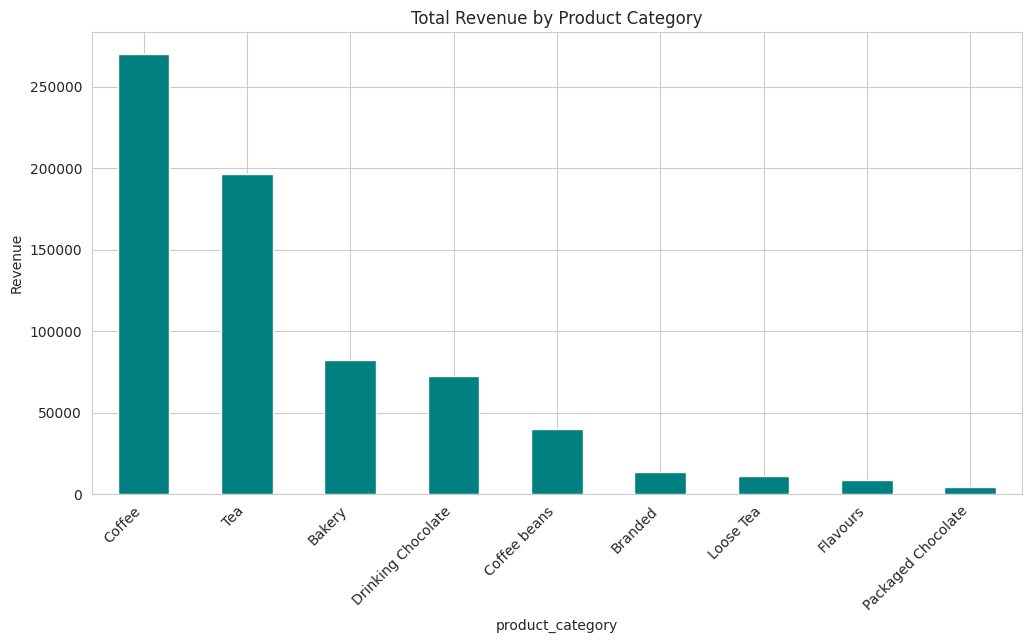

In [25]:
cat_rev = df_clean.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
cat_rev.plot(kind='bar', color='teal')
plt.title('Total Revenue by Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

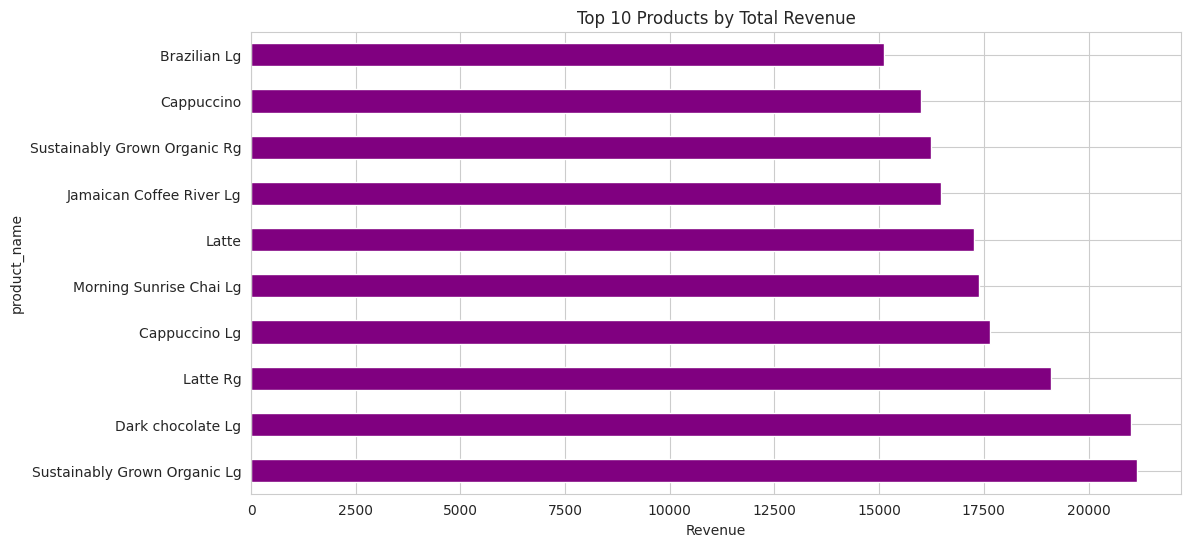

In [26]:
top_prod_rev = df_clean.groupby('product_name')['revenue'].sum().nlargest(10)
top_prod_rev.plot(kind='barh', color='purple')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Revenue')
plt.show()

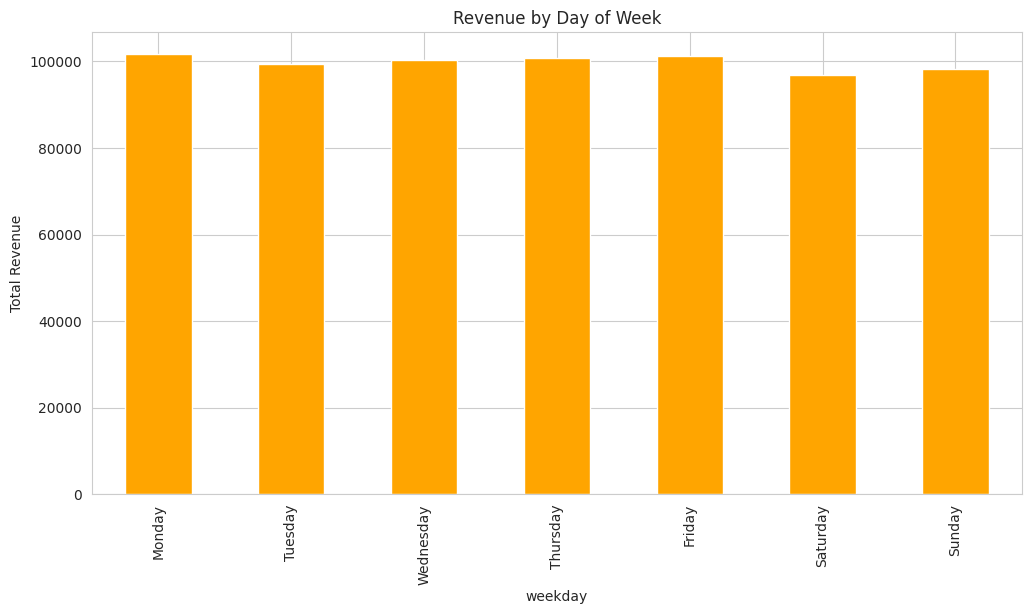

In [27]:
weekday_rev = df_clean.groupby('weekday')['revenue'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday_rev.plot(kind='bar', color='orange')
plt.title('Revenue by Day of Week')
plt.ylabel('Total Revenue')
plt.show()

/tmp/ipython-input-2459108489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='product_category', y='unit_price', palette='Set1')


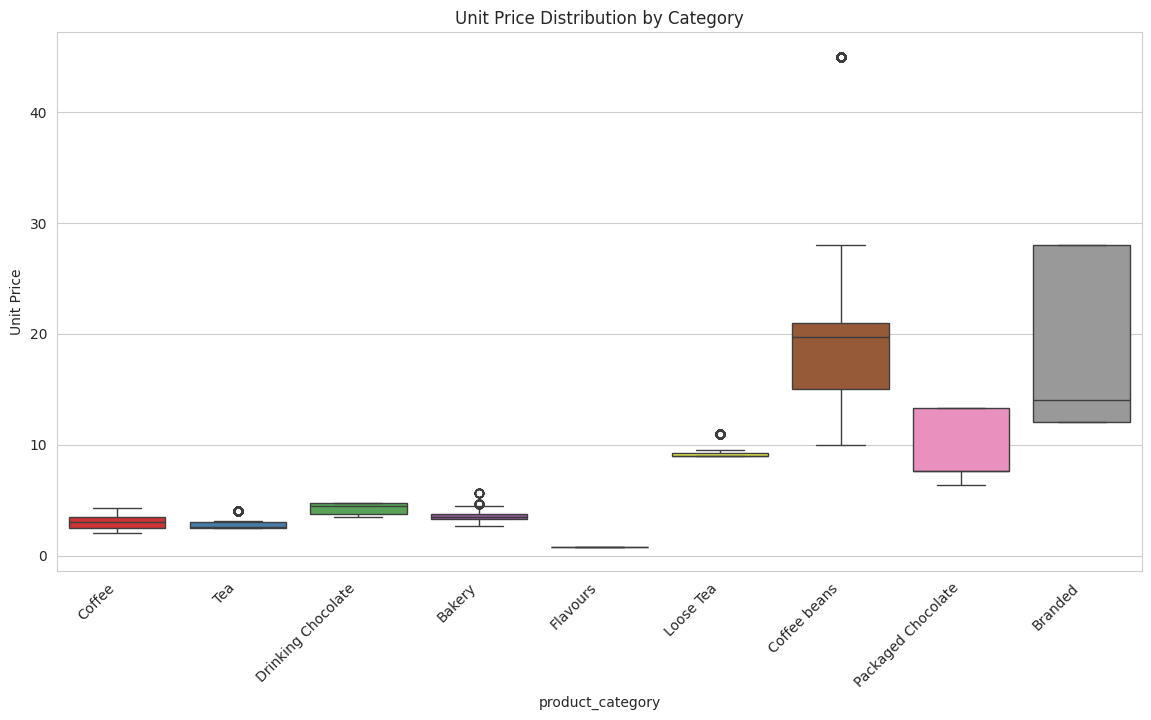

In [28]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df_clean, x='product_category', y='unit_price', palette='Set1')
plt.title('Unit Price Distribution by Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Unit Price')
plt.show()

In [29]:
df_clean['hour'] = pd.to_datetime(df_clean['transaction_time'], errors='coerce').dt.hour

In [30]:
df_clean['hour'] = pd.to_datetime(
    df_clean['transaction_time'],
    format='%H:%M:%S',
    errors='coerce'
).dt.hour

In [31]:

print(df_clean['hour'].describe())
print("\nUnique hours:", sorted(df_clean['hour'].dropna().unique().tolist()))
print("Number of NaN in hour now:", df_clean['hour'].isna().sum())
print("\nSample transaction_time vs hour:")
print(df_clean[['transaction_time', 'hour']].head(12))

count   149116.00
mean        11.74
std          3.76
min          6.00
25%          9.00
50%         11.00
75%         15.00
max         20.00
Name: hour, dtype: float64

Unique hours: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Number of NaN in hour now: 0

Sample transaction_time vs hour:
   transaction_time  hour
0          07:06:11     7
1          07:08:56     7
2          07:14:04     7
3          07:20:24     7
4          07:22:41     7
5          07:22:41     7
6          07:25:49     7
7          07:33:34     7
8          07:39:13     7
9          07:39:34     7
10         07:43:05     7
11         07:44:35     7


In [32]:
pivot_raw = df_clean.pivot_table(
    index='weekday',
    columns='hour',
    values='revenue',
    aggfunc='sum',
    fill_value=0
)

print("Pivot shape now:", pivot_raw.shape)
print("Pivot weekdays:", pivot_raw.index.tolist())
print("Pivot hours:", pivot_raw.columns.tolist())

Pivot shape now: (7, 15)
Pivot weekdays: ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
Pivot hours: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


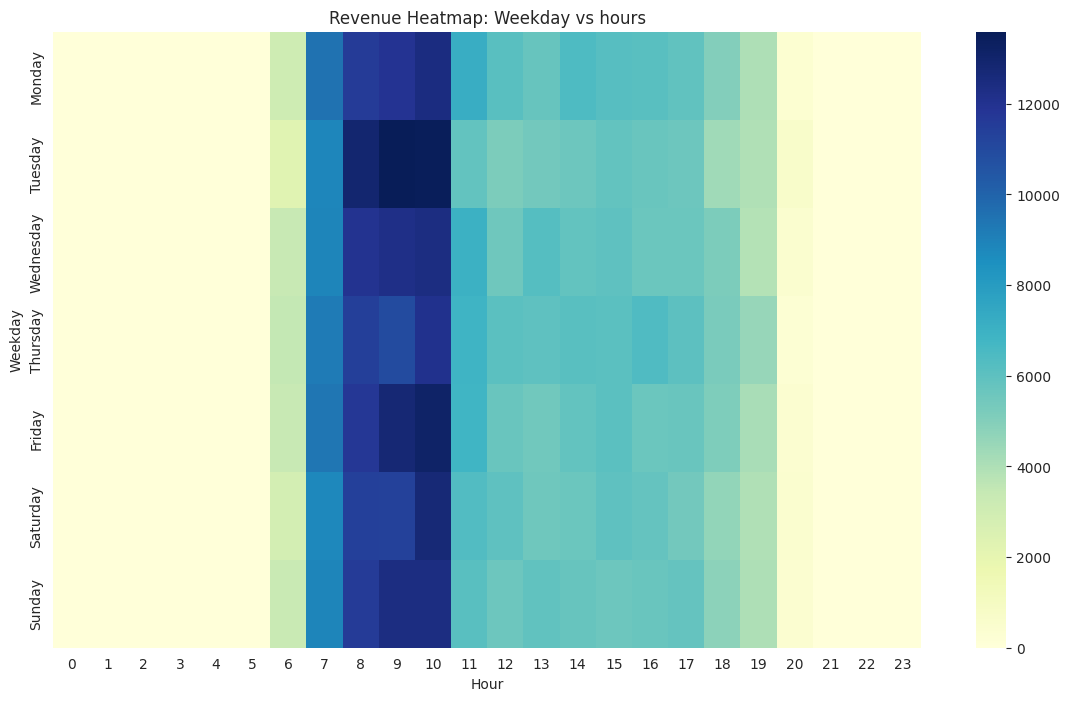

In [33]:
all_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

heatmap_safe = pivot_raw.reindex(index=all_days, columns=range(0, 24), fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_safe, cmap='YlGnBu', annot=False, cbar=True)
plt.title('Revenue Heatmap: Weekday vs hours')
plt.ylabel('Weekday')
plt.xlabel('Hour')
plt.show()

**Key Insight**: Revenue peaks sharply between 7–11 AM across all days, reflecting morning coffee demand. Weekends show slightly more afternoon activity, but the business is heavily breakfast-oriented.

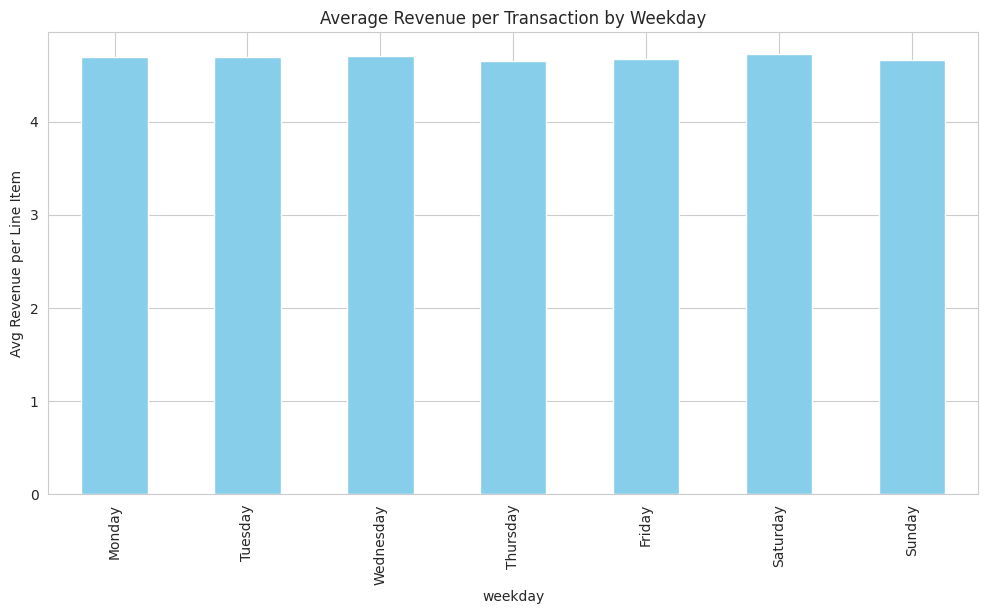

In [34]:
weekday_avg = df_clean.groupby('weekday')['revenue'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday_avg.plot(kind='bar', color='skyblue')
plt.title('Average Revenue per Transaction by Weekday')
plt.ylabel('Avg Revenue per Line Item')
plt.show()

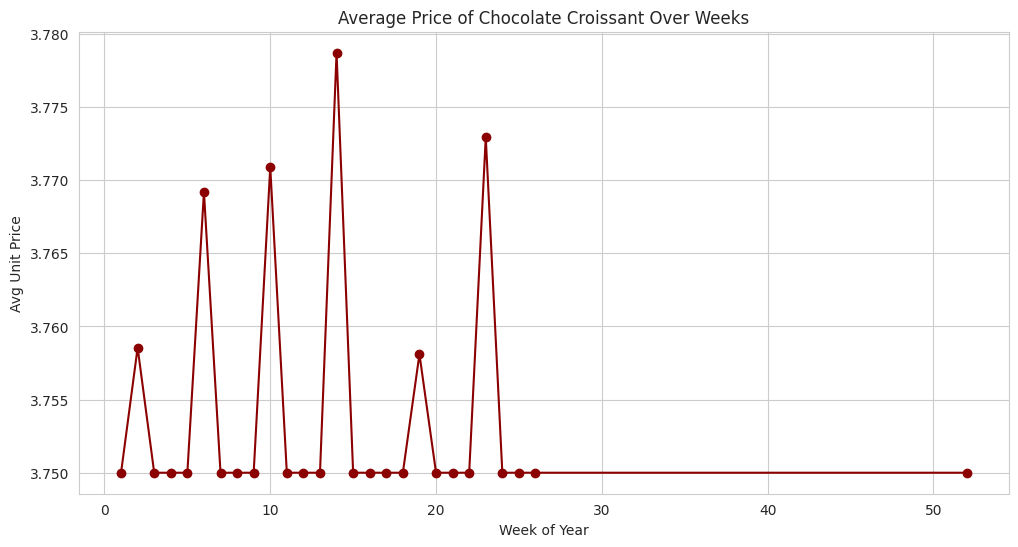

In [35]:
croissant = df_clean[df_clean['product_name'] == 'Chocolate Croissant']
weekly_price = croissant.groupby('week_of_year')['unit_price'].mean()
weekly_price.plot(marker='o', color='darkred')
plt.title('Average Price of Chocolate Croissant Over Weeks')
plt.ylabel('Avg Unit Price')
plt.xlabel('Week of Year')
plt.show()

In [36]:
df_clean.columns.tolist()

['transaction_id',
 'transaction_date',
 'transaction_time',
 'transaction_qty',
 'store_id',
 'store_location',
 'product_id',
 'unit_price',
 'product_category',
 'product_type',
 'product_detail',
 'date',
 'weekday',
 'weekday_num',
 'is_weekend',
 'month',
 'month_name',
 'week_of_year',
 'revenue',
 'product_name',
 'product_short',
 'hour']

In [37]:
agg_dict = {
    'transaction_qty': 'sum',
    'revenue': 'sum',
    'unit_price': ['mean', 'min', 'max'],
    'transaction_id': 'count'
}

In [38]:
df_agg = df_clean.groupby(['product_name', 'week_of_year', 'product_category', 'product_type']).agg(agg_dict).reset_index()

In [39]:
df_agg

product_name week_of_year product_category  \
                                                                
0              Almond Croissant            1           Bakery   
1              Almond Croissant            2           Bakery   
2              Almond Croissant            3           Bakery   
3              Almond Croissant            4           Bakery   
4              Almond Croissant            5           Bakery   
...                         ...          ...              ...   
2079  Traditional Blend Chai Rg           23              Tea   
2080  Traditional Blend Chai Rg           24              Tea   
2081  Traditional Blend Chai Rg           25              Tea   
2082  Traditional Blend Chai Rg           26              Tea   
2083  Traditional Blend Chai Rg           52              Tea   

         product_type transaction_qty revenue unit_price            \
                                  sum     sum       mean  min  max   
0              Pastry              38  142.50       3.75 3.75 3.75   
1              Pastry              57  213.75       3.75 3.75 3.75   
2              Pastry              55  206.25       3.75 3.75 3.75   
3              Pastry              55  206.25       3.75 3.75 3.75   
4              Pastry              45  168.75       3.75 3.75 3.75   
...               ...             ...     ...        ...  ...  ...   
2079  Brewed Chai tea             254  635.00       2.50 2.50 2.50   
2080  Brewed Chai tea             245  612.50       2.50 2.50 2.50   
2081  Brewed Chai tea             238  595.00       2.50 2.50 2.50   
2082  Brewed Chai tea             170  425.00       2.50 2.50 2.50   
2083  Brewed Chai tea              13   32.50       2.50 2.50 2.50   

     transaction_id  
              count  
0                37  
1                57  
2                55  
3                55  
4                45  
...             ...  
2079            170  
2080            166  
2081            151  
2082            109  
2083              9  

[2084 rows x 10 columns]

In [40]:
df_agg.columns

MultiIndex([(    'product_name',      ''),
            (    'week_of_year',      ''),
            ('product_category',      ''),
            (    'product_type',      ''),
            ( 'transaction_qty',   'sum'),
            (         'revenue',   'sum'),
            (      'unit_price',  'mean'),
            (      'unit_price',   'min'),
            (      'unit_price',   'max'),
            (  'transaction_id', 'count')],
           )

In [41]:
df_agg.columns = ['product_name', 'week_of_year', 'product_category', 'product_type',
                  'total_qty', 'total_revenue',
                  'avg_price', 'min_price', 'max_price',
                  'n_transactions']

print(df_agg.shape)
df_agg.head(10)

(2084, 10)


,product_name,week_of_year,product_category,product_type,total_qty,total_revenue,avg_price,min_price,max_price,n_transactions
0,Almond Croissant,1,Bakery,Pastry,38,142.50,3.75,3.75,3.75,37
1,Almond Croissant,2,Bakery,Pastry,57,213.75,3.75,3.75,3.75,57
2,Almond Croissant,3,Bakery,Pastry,55,206.25,3.75,3.75,3.75,55
3,Almond Croissant,4,Bakery,Pastry,55,206.25,3.75,3.75,3.75,55
4,Almond Croissant,5,Bakery,Pastry,45,168.75,3.75,3.75,3.75,45
5,Almond Croissant,6,Bakery,Pastry,44,165.00,3.75,3.75,3.75,43
6,Almond Croissant,7,Bakery,Pastry,53,198.75,3.75,3.75,3.75,53
7,Almond Croissant,8,Bakery,Pastry,57,213.75,3.75,3.75,3.75,57
8,Almond Croissant,9,Bakery,Pastry,60,225.00,3.75,3.75,3.75,60
9,Almond Croissant,10,Bakery,Pastry,50,187.50,3.75,3.75,3.75,49


In [42]:
df_agg['log_qty']   = np.log(df_agg['total_qty'] + 1)
df_agg['log_price'] = np.log(df_agg['avg_price'] + 1e-6)

In [43]:
df_agg['price_range'] = df_agg['max_price'] - df_agg['min_price']

In [44]:
df_agg.head(5)

,product_name,week_of_year,product_category,product_type,total_qty,total_revenue,avg_price,min_price,max_price,n_transactions,log_qty,log_price,price_range
0,Almond Croissant,1,Bakery,Pastry,38,142.50,3.75,3.75,3.75,37,3.66,1.32,0.00
1,Almond Croissant,2,Bakery,Pastry,57,213.75,3.75,3.75,3.75,57,4.06,1.32,0.00
2,Almond Croissant,3,Bakery,Pastry,55,206.25,3.75,3.75,3.75,55,4.03,1.32,0.00
3,Almond Croissant,4,Bakery,Pastry,55,206.25,3.75,3.75,3.75,55,4.03,1.32,0.00
4,Almond Croissant,5,Bakery,Pastry,45,168.75,3.75,3.75,3.75,45,3.83,1.32,0.00


In [45]:
product_counts = df_agg.groupby('product_name').agg({
    'week_of_year': 'nunique',
    'n_transactions': 'sum',
    'price_range': 'max'
}).reset_index()

In [46]:
good_products = product_counts[
    (product_counts['week_of_year'] >= 10) &
    (product_counts['n_transactions'] >= 50) &
    (product_counts['price_range'] > 0.01)]['product_name'].tolist()

In [47]:
df_agg_filtered = df_agg[df_agg['product_name'].isin(good_products)].copy()

In [48]:
print(good_products)

['Almond Croissant', 'Chocolate Chip Biscotti', 'Chocolate Croissant', 'Cranberry Scone', 'Croissant', 'Ginger Biscotti', 'Ginger Scone', 'Hazelnut Biscotti', 'I Need My Bean! Diner mug', 'I Need My Bean! Latte cup', 'I Need My Bean! T-shirt', 'Jumbo Savory Scone', 'Organic Decaf Blend', 'Ouro Brasileiro shot', 'Scottish Cream Scone ']


In [49]:
print(df_agg_filtered[['total_qty', 'avg_price', 'log_qty', 'log_price', 'n_transactions', 'price_range']].describe())

       total_qty  avg_price  log_qty  log_price  n_transactions  price_range
count     393.00     393.00   393.00     393.00          393.00       393.00
mean       65.24       7.36     3.78       1.66           61.47         0.82
std        46.51       7.46     1.10       0.74           41.53         2.47
min         1.00       2.48     0.69       0.91            1.00         0.00
25%        21.00       3.29     3.09       1.19           21.00         0.00
50%        63.00       3.75     4.16       1.32           61.00         0.00
75%        93.00       4.54     4.54       1.51           89.00         0.81
max       275.00      28.00     5.62       3.33          232.00        16.00


In [50]:
print("\nAverage weeks per product:",
      df_agg_filtered.groupby('product_name')['week_of_year'].nunique().mean().round(1))


Average weeks per product: 26.2


In [51]:
df_agg_filtered.to_pickle('coffee_sales_agg_weekly.pkl')

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [53]:
variation_summary = df_agg_filtered.groupby('product_name').agg({
    'week_of_year': 'nunique',
    'price_range': lambda x: (x > 0).sum()
}).reset_index()

In [54]:
variation_summary = variation_summary.rename(columns={'price_range': 'weeks_with_variation'})
variation_summary

,product_name,week_of_year,weeks_with_variation
0,Almond Croissant,27,2
1,Chocolate Chip Biscotti,27,9
2,Chocolate Croissant,27,6
3,Cranberry Scone,27,8
4,Croissant,27,9
5,Ginger Biscotti,27,6
6,Ginger Scone,27,19
7,Hazelnut Biscotti,27,6
8,I Need My Bean! Diner mug,24,5
9,I Need My Bean! Latte cup,24,8


In [55]:
good_variation_products = variation_summary[
    (variation_summary['weeks_with_variation'] >= 5) &
    (variation_summary['week_of_year'] >= 10)
]['product_name'].tolist()

In [56]:
print(good_variation_products)

['Chocolate Chip Biscotti', 'Chocolate Croissant', 'Cranberry Scone', 'Croissant', 'Ginger Biscotti', 'Ginger Scone', 'Hazelnut Biscotti', 'I Need My Bean! Diner mug', 'I Need My Bean! Latte cup', 'I Need My Bean! T-shirt', 'Jumbo Savory Scone', 'Organic Decaf Blend', 'Ouro Brasileiro shot', 'Scottish Cream Scone ']


In [57]:
def run_elasticity_model(product_df):
    if len(product_df) < 10:
        return None
    X = sm.add_constant(product_df['log_price'])
    y = product_df['log_qty']
    model = sm.OLS(y, X).fit()

    elasticity = model.params[1]
    p_value = model.pvalues[1]
    r2 = model.rsquared

    return {
        'elasticity': elasticity,
        'p_value': p_value,
        'r2': r2,
        'n_obs': len(product_df),
        'summary': model.summary()
    }

In [58]:
results = []

for prod in good_variation_products:
    subset = df_agg_filtered[df_agg_filtered['product_name'] == prod]
    result = run_elasticity_model(subset)
    if result:
        result['product_name'] = prod
        results.append(result)

/tmp/ipython-input-2053302696.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elasticity = model.params[1]
/tmp/ipython-input-2053302696.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
/tmp/ipython-input-2053302696.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elasticity = model.params[1]
/tmp/ipython-input-2053302696.py:9: FutureWarning: Series.__getitem__ treating keys as positions is depre

In [59]:
if results:
    results_df = pd.DataFrame(results)
    results_df = results_df[['product_name', 'elasticity', 'p_value', 'r2', 'n_obs']]
    results_df['elasticity_interpretation'] = results_df['elasticity'].apply(
        lambda x: 'Elastic (> -1)' if x < -1 else
                  'Moderately Elastic (-1 to -0.3)' if -1 <= x < -0.3 else
                  'Inelastic (>-0.3 or positive)' if x >= -0.3 else 'Very Elastic (<< -1)'
    )
    results_df = results_df.sort_values('elasticity')

    print("Elasticity Results:")
    display(results_df.round(3))

Elasticity Results:


,product_name,elasticity,p_value,r2,n_obs,elasticity_interpretation
9,I Need My Bean! T-shirt,-110.51,0.00,0.38,24,Elastic (> -1)
5,Ginger Scone,-14.21,0.00,0.28,27,Elastic (> -1)
12,Ouro Brasileiro shot,-6.68,0.00,0.47,27,Elastic (> -1)
10,Jumbo Savory Scone,-2.03,0.90,0.00,27,Elastic (> -1)
11,Organic Decaf Blend,2.24,0.25,0.06,24,Inelastic (>-0.3 or positive)
3,Croissant,3.74,0.80,0.00,27,Inelastic (>-0.3 or positive)
0,Chocolate Chip Biscotti,6.77,0.80,0.00,27,Inelastic (>-0.3 or positive)
7,I Need My Bean! Diner mug,9.46,0.11,0.11,24,Inelastic (>-0.3 or positive)
8,I Need My Bean! Latte cup,10.60,0.05,0.16,24,Inelastic (>-0.3 or positive)
6,Hazelnut Biscotti,13.71,0.52,0.02,27,Inelastic (>-0.3 or positive)


In [60]:
results_df.to_csv('elasticity_results.csv', index=False)

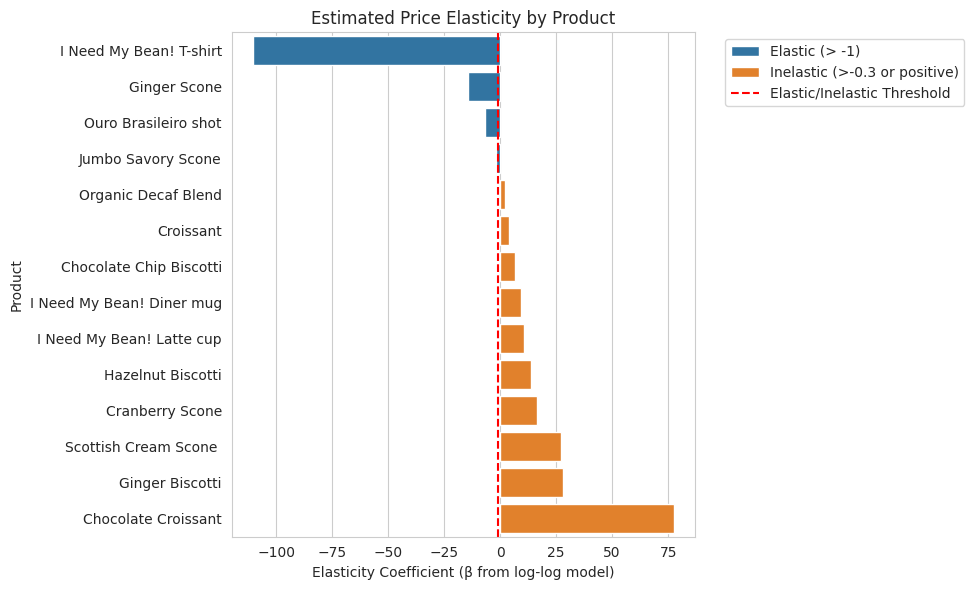

<Figure size 1200x600 with 0 Axes>

In [61]:
if 'results_df' in locals() and not results_df.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x='elasticity', y='product_name', hue='elasticity_interpretation', dodge=False)
    plt.axvline(-1, color='red', linestyle='--', label='Elastic/Inelastic Threshold')
    plt.title('Estimated Price Elasticity by Product')
    plt.xlabel('Elasticity Coefficient (β from log-log model)')
    plt.ylabel('Product')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    plt.savefig('elasticity_barplot.png', dpi=300, bbox_inches='tight')

In [62]:
if 'results_df' in locals():
    interpretation = results_df.copy()
    interpretation['recommendation'] = interpretation['elasticity'].apply(
        lambda x: 'Increase discounts/promotions (elastic demand)' if x < -1 else
                  'Maintain or slightly increase price (inelastic)' if -1 <= x <= -0.3 else
                  'Investigate further / avoid heavy discounts (inelastic or positive)' if x > -0.3 else 'Strong promotion candidate'
    )
    interpretation = interpretation[['product_name', 'elasticity', 'p_value', 'r2', 'n_obs', 'recommendation']]
    display(interpretation.round(3))

    interpretation.to_csv('elasticity_recommendations.csv', index=False)

,product_name,elasticity,p_value,r2,n_obs,recommendation
9,I Need My Bean! T-shirt,-110.51,0.00,0.38,24,Increase discounts/promotions (elastic demand)
5,Ginger Scone,-14.21,0.00,0.28,27,Increase discounts/promotions (elastic demand)
12,Ouro Brasileiro shot,-6.68,0.00,0.47,27,Increase discounts/promotions (elastic demand)
10,Jumbo Savory Scone,-2.03,0.90,0.00,27,Increase discounts/promotions (elastic demand)
11,Organic Decaf Blend,2.24,0.25,0.06,24,Investigate further / avoid heavy discounts (i...
3,Croissant,3.74,0.80,0.00,27,Investigate further / avoid heavy discounts (i...
0,Chocolate Chip Biscotti,6.77,0.80,0.00,27,Investigate further / avoid heavy discounts (i...
7,I Need My Bean! Diner mug,9.46,0.11,0.11,24,Investigate further / avoid heavy discounts (i...
8,I Need My Bean! Latte cup,10.60,0.05,0.16,24,Investigate further / avoid heavy discounts (i...
6,Hazelnut Biscotti,13.71,0.52,0.02,27,Investigate further / avoid heavy discounts (i...


### Key Findings & Recommendations

- **Highly Elastic Items** (elasticity < -1): T-shirt, Ginger Scone, Jumbo Savory Scone → **Aggressive discounting** (15–25%) can drive volume and revenue without much margin loss.
- **Inelastic / Positive Items** (elasticity > -0.3): Chocolate Croissant, Ginger Biscotti, Cranberry Scone → **Avoid deep discounts** — customers buy anyway; focus on upselling or bundle instead.
- **Merch (T-shirts, mugs)**: Very price-sensitive → use as loss-leaders or promo items to attract foot traffic.
- **Core bakery** shows mixed sensitivity → segment promotions by item (e.g., promote scones more than croissants).
- **Limitation**: Only ~15 products had price variation; most drinks fixed-price → assumed inelastic. Future data with promotions would enable fuller analysis.

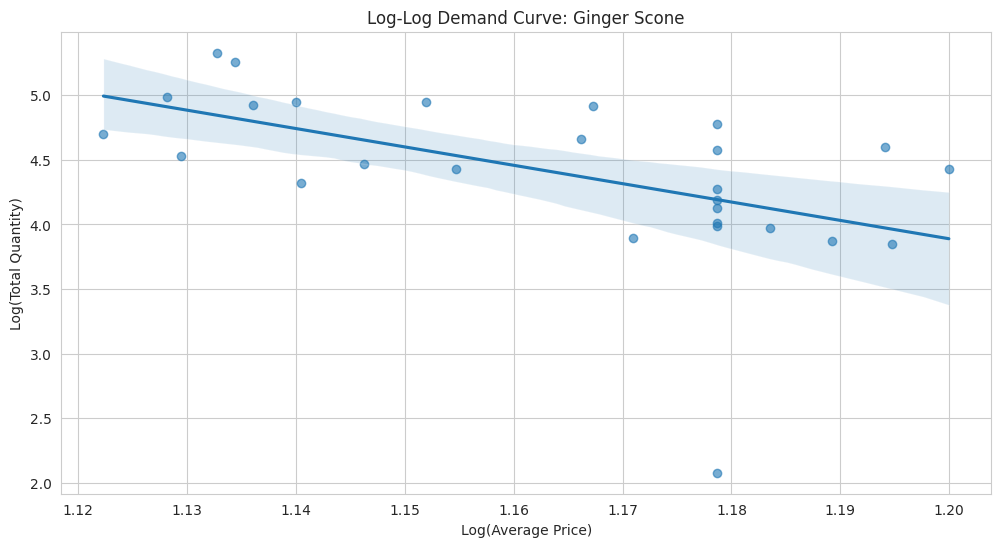

<Figure size 1200x600 with 0 Axes>

In [63]:
scone = df_agg_filtered[df_agg_filtered['product_name'] == 'Ginger Scone']
sns.regplot(data=scone, x='log_price', y='log_qty', scatter_kws={'alpha':0.6})
plt.title('Log-Log Demand Curve: Ginger Scone')
plt.xlabel('Log(Average Price)')
plt.ylabel('Log(Total Quantity)')
plt.show()
plt.savefig('demand_curve_ginger_scone.png', dpi=300)

In [64]:
df_clean.to_csv('coffee_sales_clean.csv', index=False)
df_agg_filtered.to_csv('coffee_sales_agg_weekly.csv', index=False)

In [65]:
if 'results_df' in globals():
    results_df.to_csv('elasticity_results.csv', index=False)
    print("Exported: elasticity_results.csv")
elif 'elasticity_results' in globals():
    elasticity_results.to_csv('elasticity_results.csv', index=False)
    print("Exported: elasticity_results.csv")

Exported: elasticity_results.csv
